<a href="https://colab.research.google.com/github/brayla-oya/DDDS-My-Projects/blob/main/Project_2_BB_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing

The project should be done using Regression prediction techniques ( with feature scaling and regularization ) as covered in class. The goal is to minimize the RMS percentage error ( root mean squared percentage error - RMSPE ) on your prediction of the house sales price.

Any of the available features can be used in the regression, but a minimum set of variables that do the job should be the ultimate goal.

Be sure to go through the whole data science process and document as such in your Jupyter notebook.

This project will have less direct "To Do" guidance and the progression through the data science process will be more individualized this time around. We will talk about all the issues during class so you're not going to be out on a ledge with this one, I just want to move you towards performing a data science project on your own eventually.

A data dictionary file is available at AWS S3 at Housing Data Dictionary.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .




## Problem Definition


The business problem is a supervised learning problem because it predicts house sale prices based on property features. The target variable is SalePrice and it is a regression problem.

## Data Collection/Sources


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

## Data Cleaning


### S.H.I.D. Shape, Head, Info, Describe

In [175]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
house = pd.read_csv( url )

In [176]:
house.shape

(2637, 81)

In [177]:
house.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [178]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [179]:
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [180]:
# make a copy
house_clean = house.copy()

In [181]:
house_clean.dtypes

,0
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
...,...
Mo Sold,int64
Yr Sold,int64
Sale Type,object
Sale Condition,object


In [182]:
# check ALL nulls
house_clean = house.copy()
house_clean.isna().sum().sum()

np.int64(14208)

In [183]:
 # shows % of nulls per columns/feature
nulls = house_clean.isnull().sum()
filter = nulls > 0
( nulls[ filter ].sort_values( ascending = False ) / house_clean.shape[0] * 100 ).round(1)

,0
Pool QC,99.6
Misc Feature,96.4
Alley,93.2
Fence,80.0
Mas Vnr Type,60.9
Fireplace Qu,48.7
Lot Frontage,17.0
Garage Cond,5.6
Garage Yr Blt,5.6
Garage Finish,5.6


In [184]:
# Dropped columns w/ 20% or more nulls
drop_column = (( nulls[ filter ].sort_values( ascending = False ) / house_clean.shape[0] * 100 ).round(1)) >= 20
columns_to_drop = drop_column[drop_column].index
house_clean = house_clean.drop(columns=columns_to_drop)
house_clean

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,...,0,0,126,0,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,165000


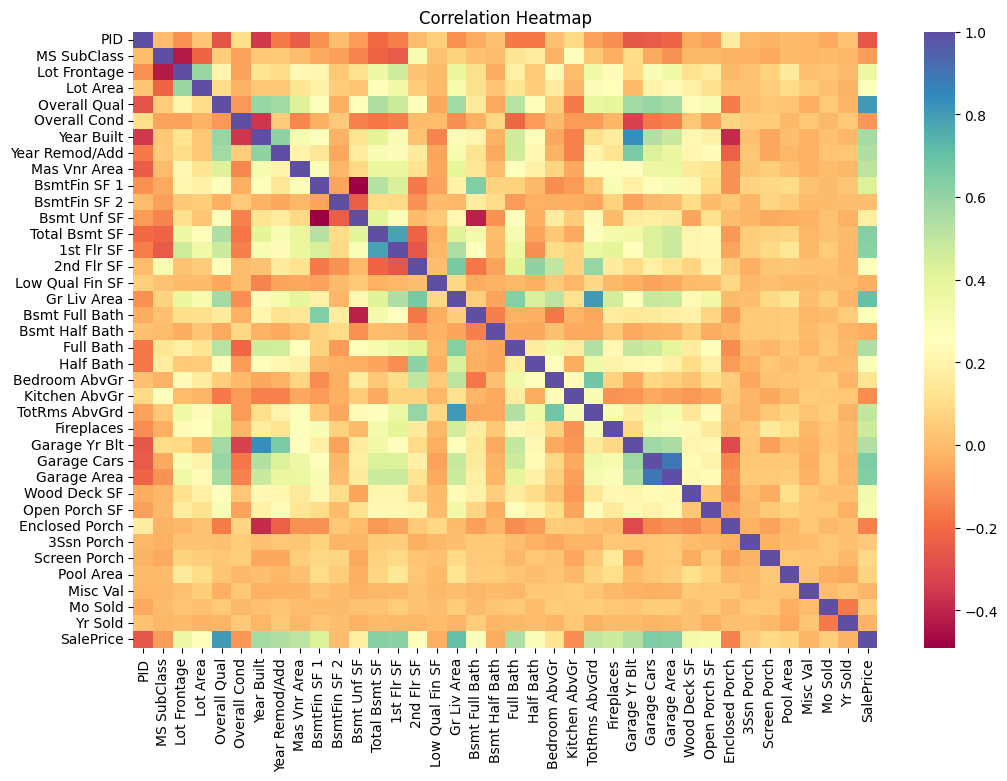

In [185]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    house_clean.select_dtypes(include=np.number).corr(),
    annot=False,
    fmt=".2f",
    cmap='Spectral'
    )
plt.title('Correlation Heatmap')
plt.show()


## Exploratory Data Analysis


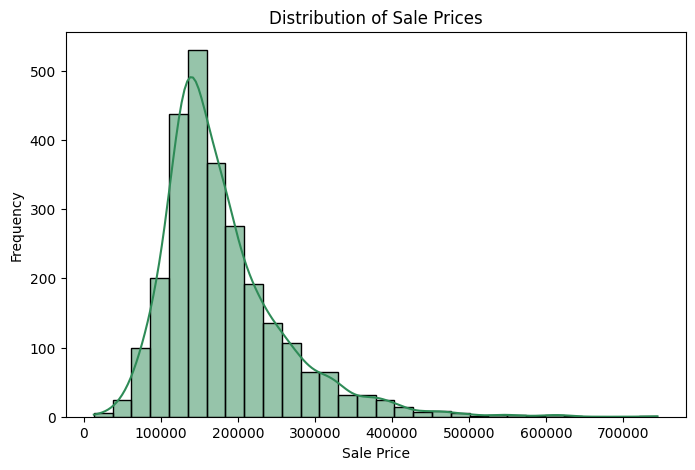

In [186]:
#1: Distribution of Sale Prices
plt.figure(figsize=(8, 5))
sns.histplot(house_clean['SalePrice'], bins=30, kde=True, color='seagreen')
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

The distribution of Sale Prices is right skewed (positive) meaning that most houses sold at lower prices.

In [187]:
# Compute the correlation matrix
corr_matrix = house_clean.corr(numeric_only=True)
corr_matrix
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_corr)

SalePrice          1.000000
Overall Qual       0.805016
Gr Liv Area        0.705482
Garage Cars        0.647223
Garage Area        0.633900
Total Bsmt SF      0.628669
1st Flr SF         0.618247
Year Built         0.562777
Full Bath          0.542386
Year Remod/Add     0.539932
Garage Yr Blt      0.529771
Mas Vnr Area       0.506402
TotRms AbvGrd      0.493853
Fireplaces         0.468886
BsmtFin SF 1       0.427809
Lot Frontage       0.357142
Wood Deck SF       0.322060
Open Porch SF      0.310361
Half Bath          0.287063
Bsmt Full Bath     0.277328
Lot Area           0.268516
2nd Flr SF         0.268059
Bsmt Unf SF        0.174628
Bedroom AbvGr      0.131789
Screen Porch       0.091214
Pool Area          0.072427
Mo Sold            0.052800
3Ssn Porch         0.040625
BsmtFin SF 2       0.009329
Misc Val          -0.019955
Yr Sold           -0.030053
Low Qual Fin SF   -0.040838
Bsmt Half Bath    -0.042482
MS SubClass       -0.078857
Overall Cond      -0.095205
Kitchen AbvGr     -0

/tmp/ipython-input-188-3516646783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis') ;


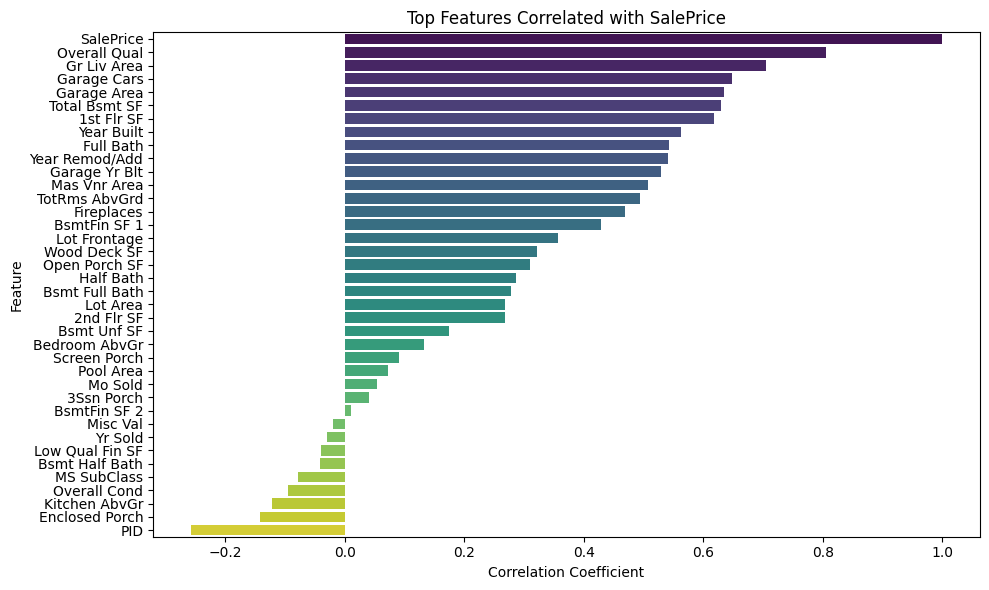

In [188]:
# select top N features
top_corr = saleprice_corr.head(70)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis') ;

plt.title('Top Features Correlated with SalePrice') ;
plt.xlabel('Correlation Coefficient') ;
plt.ylabel('Feature') ;
plt.tight_layout() ;
plt.show() ;

In [189]:
# I decided to start with the top 6 highly correlated features + SalePrice
columns_to_keep = ['Overall Qual', 'SalePrice','Gr Liv Area', 'Garage Cars', 'Garage Area',
                   'Total Bsmt SF', '1st Flr SF']
house_clean2 = house_clean[columns_to_keep]
house_clean2

,Overall Qual,SalePrice,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,4,115400,1005,2.0,440.0,1005.0,1005
1,4,90000,1296,2.0,516.0,0.0,1296
2,6,141000,1375,1.0,544.0,780.0,780
3,8,254000,1848,2.0,592.0,975.0,975
4,7,155000,1135,2.0,576.0,560.0,575
...,...,...,...,...,...,...,...
2632,6,114500,1176,2.0,528.0,816.0,816
2633,7,162000,1061,2.0,462.0,1054.0,1061
2634,8,211500,1226,2.0,484.0,1226.0,1226
2635,6,165000,1350,2.0,478.0,1064.0,1350


/tmp/ipython-input-190-63554103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='coolwarm')


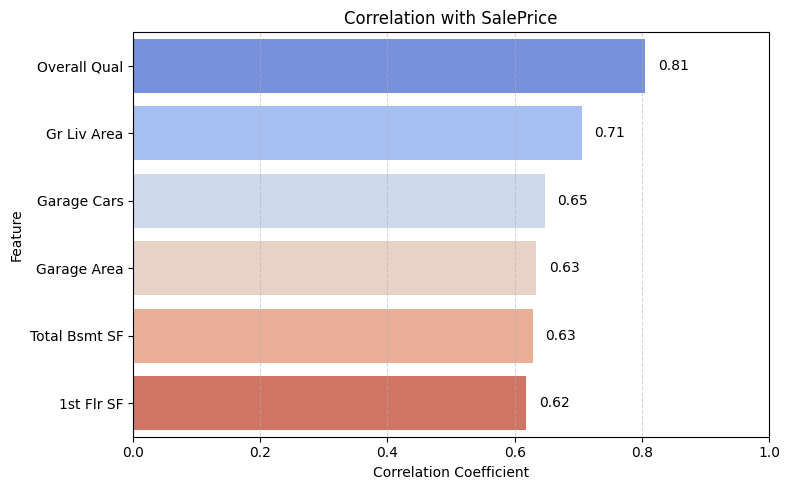

In [190]:
# Compute correlations with SalePrice
corr_with_price = house_clean2.corr()['SalePrice'].drop('SalePrice')

# Sort by absolute correlation (optional, for better visualization)
corr_with_price = corr_with_price.reindex(corr_with_price.abs().sort_values(ascending=False).index)

# Plot bar chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=corr_with_price.values, y=corr_with_price.index, palette='coolwarm')

# Annotate each bar with correlation value
for i, (value, name) in enumerate(zip(corr_with_price.values, corr_with_price.index)):
    ax.text(value + 0.02 if value >= 0 else value - 0.02, i, f'{value:.2f}',
            color='black', va='center', ha='left' if value >= 0 else 'right')

plt.title('Correlation with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

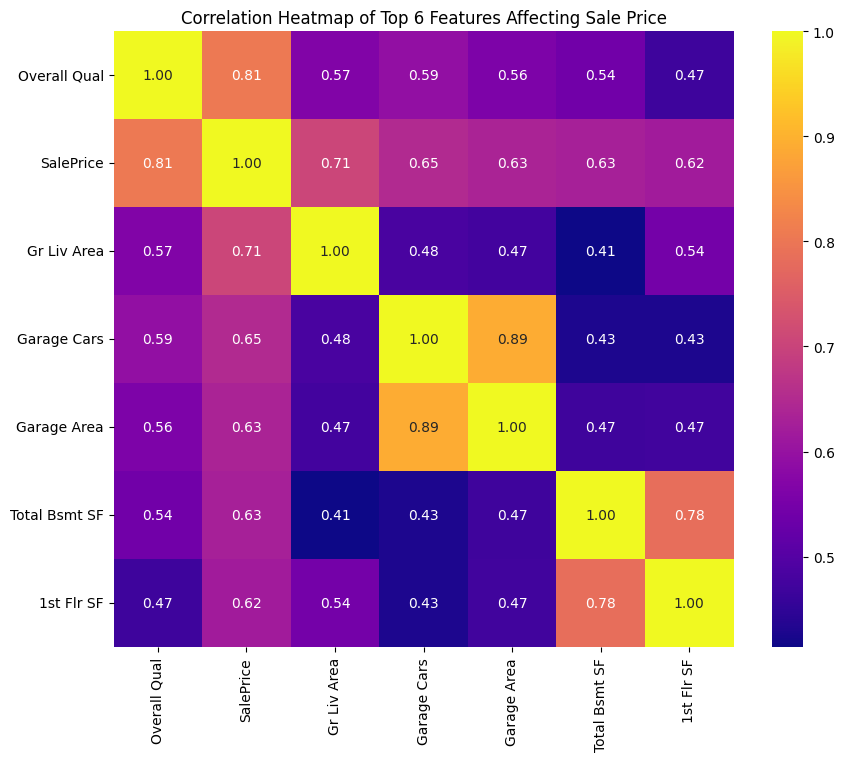

In [191]:
plt.figure(figsize=(10, 8))
sns.heatmap(house_clean2.corr(), annot=True, cmap="plasma", fmt=".2f")
plt.title("Correlation Heatmap of Top 6 Features Affecting Sale Price")
plt.show()

In [192]:
house_clean2.dtypes.sort_values()

,0
Overall Qual,int64
SalePrice,int64
Gr Liv Area,int64
1st Flr SF,int64
Garage Cars,float64
Garage Area,float64
Total Bsmt SF,float64


In [193]:
house_clean2.describe()

,Overall Qual,SalePrice,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
count,2637.000000,2637.000000,2637.000000,2636.000000,2636.000000,2636.000000,2637.000000
mean,6.097459,179986.230186,1496.985210,1.763278,470.968134,1045.179059,1155.505878
std,1.411522,78309.251522,495.209631,0.760576,212.816905,429.686089,382.597499
min,1.000000,12789.000000,334.000000,0.000000,0.000000,0.000000,334.000000
25%,5.000000,129500.000000,1128.000000,1.000000,324.750000,792.000000,878.000000
50%,6.000000,160000.000000,1441.000000,2.000000,480.000000,988.000000,1082.000000
75%,7.000000,213000.000000,1740.000000,2.000000,576.000000,1290.250000,1380.000000
max,10.000000,745000.000000,5642.000000,5.000000,1488.000000,6110.000000,4692.000000


In [194]:
house_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2637 non-null   int64  
 1   SalePrice      2637 non-null   int64  
 2   Gr Liv Area    2637 non-null   int64  
 3   Garage Cars    2636 non-null   float64
 4   Garage Area    2636 non-null   float64
 5   Total Bsmt SF  2636 non-null   float64
 6   1st Flr SF     2637 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 144.3 KB


In [195]:
house_clean2

,Overall Qual,SalePrice,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,4,115400,1005,2.0,440.0,1005.0,1005
1,4,90000,1296,2.0,516.0,0.0,1296
2,6,141000,1375,1.0,544.0,780.0,780
3,8,254000,1848,2.0,592.0,975.0,975
4,7,155000,1135,2.0,576.0,560.0,575
...,...,...,...,...,...,...,...
2632,6,114500,1176,2.0,528.0,816.0,816
2633,7,162000,1061,2.0,462.0,1054.0,1061
2634,8,211500,1226,2.0,484.0,1226.0,1226
2635,6,165000,1350,2.0,478.0,1064.0,1350


In [196]:
house_clean2.isnull().sum()

,0
Overall Qual,0
SalePrice,0
Gr Liv Area,0
Garage Cars,1
Garage Area,1
Total Bsmt SF,1
1st Flr SF,0


We need to fix these three null values before moving forward. After checking the housing document, I found that the nulls indicated that the house didn't have that feature. Since the values were floats, I replaced the nulls with zeroes.

In [197]:
house_clean2.fillna(0, inplace=True)
house_clean2

/tmp/ipython-input-197-752585374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_clean2.fillna(0, inplace=True)


,Overall Qual,SalePrice,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,4,115400,1005,2.0,440.0,1005.0,1005
1,4,90000,1296,2.0,516.0,0.0,1296
2,6,141000,1375,1.0,544.0,780.0,780
3,8,254000,1848,2.0,592.0,975.0,975
4,7,155000,1135,2.0,576.0,560.0,575
...,...,...,...,...,...,...,...
2632,6,114500,1176,2.0,528.0,816.0,816
2633,7,162000,1061,2.0,462.0,1054.0,1061
2634,8,211500,1226,2.0,484.0,1226.0,1226
2635,6,165000,1350,2.0,478.0,1064.0,1350


In [198]:
house_clean2.isnull().sum()

,0
Overall Qual,0
SalePrice,0
Gr Liv Area,0
Garage Cars,0
Garage Area,0
Total Bsmt SF,0
1st Flr SF,0


No more nulls. Yay!

## Processing


### Linear Regression

In [199]:
# define x & y in new df
x = house_clean2.drop('SalePrice', axis=1)
y = house_clean2['SalePrice']

In [200]:
# Perform CV
n = 100
results = np.zeros(n)
for idx in range(n):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(x.columns)}")

CV RMSE: 36294.3
Number of Predictors: 6


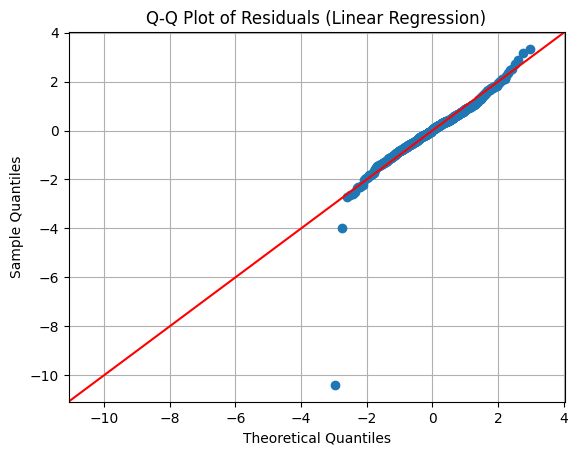

In [201]:
# # Calculate residuals
res = y_test - y_pred

# Q-Q plot to check normality of residuals
fig = sm.qqplot(res, line='45', fit=True)
plt.title("Q‑Q Plot of Residuals (Linear Regression)")
plt.grid(True)
plt.show()

This shows a right-skewed distribution with outliers.

In [202]:
# Scale Features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.48623738, -0.9936772 ,  0.31192044, -0.1445968 , -0.09251687,
        -0.39345376],
       [-1.48623738, -0.40593582,  0.31192044,  0.21232178, -2.42969959,
         0.36728094],
       [-0.06905858, -0.24637717, -1.00203196,  0.3438181 , -0.61576674,
        -0.98165069],
       ...,
       [ 1.34812022, -0.54731691,  0.31192044,  0.06204028,  0.42143077,
         0.18428634],
       [-0.06905858, -0.29687041,  0.31192044,  0.03386249,  0.04469087,
         0.5084482 ],
       [ 0.63953082,  1.66630698,  0.31192044, -0.33244868, -0.01809911,
        -0.30979908]])

In [203]:
x.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF'],
      dtype='object')

In [204]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=5)

In [205]:
x.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,4,1005,2.0,440.0,1005.0,1005
1,4,1296,2.0,516.0,0.0,1296
2,6,1375,1.0,544.0,780.0,780
3,8,1848,2.0,592.0,975.0,975
4,7,1135,2.0,576.0,560.0,575


In [206]:
x_scaled.head()

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,-1.486237,-0.993677,0.311920,-0.144597,-0.092517,-0.393454
1,-1.486237,-0.405936,0.311920,0.212322,-2.429700,0.367281
2,-0.069059,-0.246377,-1.002032,0.343818,-0.615767,-0.981651
3,1.348120,0.708955,0.311920,0.569240,-0.162284,-0.471880
4,0.639531,-0.731112,0.311920,0.494100,-1.127389,-1.517563


In [207]:
# Define RMSPE function
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

In [208]:
# Fit a linear model using Sklearn
model = LinearRegression()
my_fit_lr = model.fit(x_train, y_train)

# Make predictions
y_pred_lr = my_fit_lr.predict(x_train)

# Compute RMSPE
rmspe_lr = rmspe(y_train, y_pred_lr)

print(f'RMSPE for Linear Regression: {rmspe_lr}')

RMSPE for Linear Regression: 0.24527216815544844


In [209]:
# Create a data frame with the results from the linear regression models
model_results = pd.DataFrame()
model_results['Predictor'] = x_train.columns
model_results['Linear'] = my_fit_lr.coef_
model_results.sort_values(by=['Linear'],inplace=True, ascending=False)
model_results

,Predictor,Linear
0,Overall Qual,35408.980602
1,Gr Liv Area,20895.499153
4,Total Bsmt SF,9909.633124
2,Garage Cars,8380.727260
5,1st Flr SF,6672.282921
3,Garage Area,4810.691023


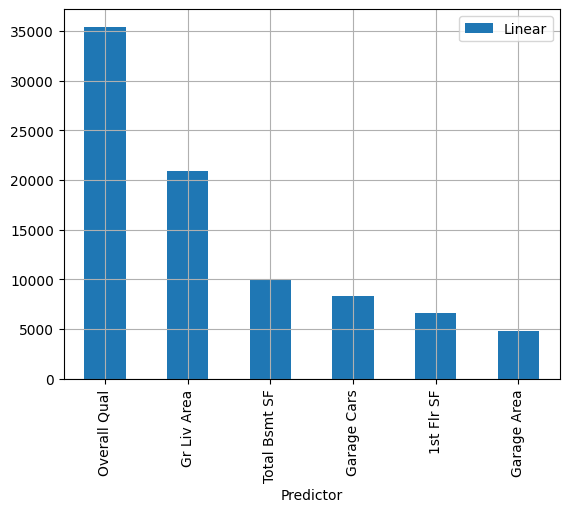

In [210]:
# Plot the coefficients
model_results.plot(x = 'Predictor', y = 'Linear', kind = 'bar')
plt.grid()

In [211]:
# cross_val_score
def rmspe_scorer(model, X, y):
    y_pred = model.predict(X)
    return rmspe(y, y_pred)

# Initialize the Linear Regression model
model = LinearRegression()

# Calculate CV RMSPE using cross-validation
results = cross_val_score(
    model,
    x_scaled,
    y,
    scoring=rmspe_scorer,
    cv=10
)

# Calculate the mean RMSPE across folds
rmspe_value = abs(results.mean())
print(f"CV RMSPE: {rmspe_value}")

CV RMSPE: 0.24067614235256576


###Ridge Regression

In [212]:
# Train the model
my_fit_rr = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1
my_fit_rr.fit(x_train, y_train) ;

In [213]:
# Define RMSPE function
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
    # Train the model
    my_fit_rr = Ridge(alpha=i)
    my_fit_rr.fit(x_train, y_train)

    # Predict using cross-validation
    y_pred = my_fit_rr.predict(x_scaled)

    # Compute RMSPE
    rmspe_score = rmspe(y, y_pred)
    results_alpha.append(rmspe_score)

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})
print(results_df.sort_values(by=['RMSPE']))

           Alpha     RMSPE
15  5.000000e+01  0.238133
14  3.000000e+01  0.238676
13  2.000000e+01  0.238979
12  1.000000e+01  0.239303
11  5.000000e+00  0.239474
10  4.000000e+00  0.239509
9   3.000000e+00  0.239544
8   2.000000e+00  0.239579
7   1.000000e+00  0.239615
6   1.000000e-01  0.239647
5   1.000000e-02  0.239650
4   1.000000e-03  0.239650
3   1.000000e-04  0.239650
2   1.000000e-08  0.239650
1   1.000000e-10  0.239650
0   1.000000e-15  0.239650


In [214]:
# Custom function to compute RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Custom scoring function for cross_val_score
def rmspe_scorer(model, X, y):
    y_pred = model.predict(X)
    return rmspe(y, y_pred)

# Retrain the model with alpha = 15
my_fit_rr = Ridge(alpha=15)
my_fit_rr.fit(x_train, y_train)

# Calculate CV RMSPE using cross-validation
results = cross_val_score(
    my_fit_rr,
    x_scaled,
    y,
    scoring=rmspe_scorer,
    cv=10
)

# Calculate the mean RMSPE across folds
rmspe_value = abs(results.mean())
print(f"CV RMSPE: {rmspe_value}")

CV RMSPE: 0.24018371085190426


In [215]:
# Add ridge regression results to data frame we created earlier
model_results['Ridge'] = my_fit_rr.coef_

In [216]:
model_results

,Predictor,Linear,Ridge
0,Overall Qual,35408.980602,35077.333607
1,Gr Liv Area,20895.499153,20826.434672
4,Total Bsmt SF,9909.633124,8411.241802
2,Garage Cars,8380.727260,4923.353646
5,1st Flr SF,6672.282921,9938.352039
3,Garage Area,4810.691023,6728.416828


###Lasso Regression

In [217]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) *100

# Specify values of alpha we want to try
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph:
  # Train the model
  my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=100_000) # Looping through alpha
  my_fit_lasso.fit(x_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(
      my_fit_lasso,
      x_scaled,
      y,
      scoring=rmspe_scorer,
      cv = 10
  )
  rmspe_value = abs(results.mean())
  results_alpha.append(rmspe_value)

results_df = pd.DataFrame({'Alpha': alph, 'RMSPE': results_alpha})
print(results_df.sort_values(by=['RMSPE']))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+12, tolerance: 1.325e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+12, tolerance: 1.461e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.498e+12, tolerance: 1.438e

           Alpha      RMSPE
15  5.000000e+01  24.044381
14  3.000000e+01  24.052386
13  2.000000e+01  24.057032
12  1.000000e+01  24.061566
11  5.000000e+00  24.064476
10  4.000000e+00  24.064942
9   3.000000e+00  24.065536
8   2.000000e+00  24.066254
7   1.000000e+00  24.066874
6   1.000000e-01  24.067540
5   1.000000e-02  24.067607
4   1.000000e-03  24.067613
3   1.000000e-04  24.067614
2   1.000000e-08  24.067614
1   1.000000e-10  24.067614
0   1.000000e-15  24.067614


In [218]:
results_df

,Alpha,RMSPE
0,1.000000e-15,24.067614
1,1.000000e-10,24.067614
2,1.000000e-08,24.067614
3,1.000000e-04,24.067614
4,1.000000e-03,24.067613
5,1.000000e-02,24.067607
6,1.000000e-01,24.067540
7,1.000000e+00,24.066874
8,2.000000e+00,24.066254
9,3.000000e+00,24.065536


RMSPE is about 24%. The model I have is ok. There could be impovements like adding more features.

In [219]:
# Add Lasso results to the data frame we created before
model_results['Lasso'] = my_fit_lasso.coef_

In [220]:
model_results

,Predictor,Linear,Ridge,Lasso
0,Overall Qual,35408.980602,35077.333607,35344.361006
1,Gr Liv Area,20895.499153,20826.434672,20883.522419
4,Total Bsmt SF,9909.633124,8411.241802,8500.706705
2,Garage Cars,8380.727260,4923.353646,4684.231306
5,1st Flr SF,6672.282921,9938.352039,9955.570302
3,Garage Area,4810.691023,6728.416828,6633.402374


## Data Visualization/Communication of Results


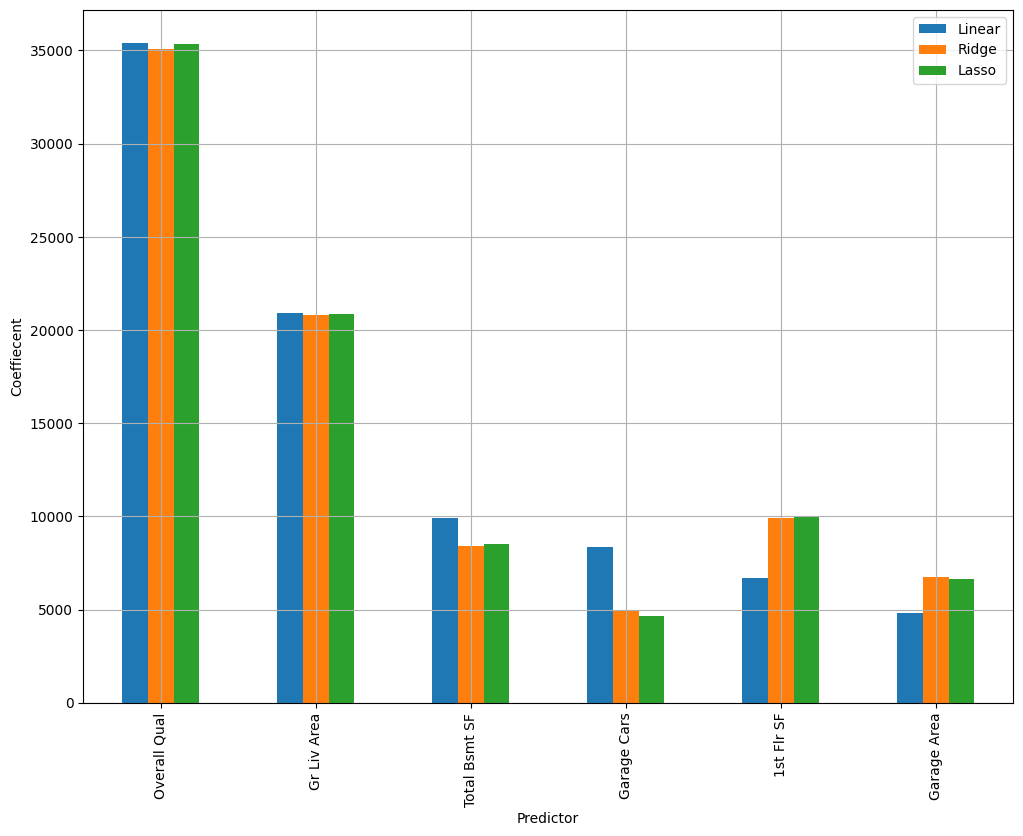

In [221]:
# Plot results
fig, ax = plt.subplots(1,1, figsize = (12,9))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coeffiecent')
plt.grid()

Out of the features I tested Overall Qual had the largest coefficient in all 3 models. Overall Qual is the best predictor of Sale Price among the features that were tested.

Gr Liv Area stayed consistent among the 3 models.

Garage Cars dropped from about 8,380 in the linear model to around 4,923 in ridge & 4,684 in lasso. This is a good example of regularization.